# 資料預處理

In [2]:
#from keras.utils import np_utils
from tensorflow.keras import utils
import numpy as np
np.random.seed(10)

In [3]:
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [4]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from tensorflow.keras.models import Sequential #順序
from tensorflow.keras.layers import Dense #稠密

In [8]:
model = Sequential() 

In [9]:
model.add(Dense(units=256,  #隱藏層
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
model.add(Dense(units=10, #輸出層
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#Param 參數 #代表個數
#第一層權重個數 大W 784*256+256(偏移值B)= 200960
#第二層權重個數 W(2) 256*10+10=2570


# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy']) 

In [14]:
train_history =model.fit(x=x_Train_normalize, #fit = match適配
                         y=y_Train_OneHot,validation_split=0.2, #validation 驗證資料：60000切成0.2份=12000（一邊訓練一邊驗證成果）
                         epochs=10, batch_size=200,verbose=2) #epochs=10 訓練週期 batch_size=200 小批次學習200筆（從剩下的48000筆資料隨機抓200筆，一共抓240次）
                        #得阻止訓練過度

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 3s - loss: 0.4386 - accuracy: 0.8830 - val_loss: 0.2246 - val_accuracy: 0.9385
Epoch 2/10
48000/48000 - 2s - loss: 0.1901 - accuracy: 0.9463 - val_loss: 0.1555 - val_accuracy: 0.9578
Epoch 3/10
48000/48000 - 2s - loss: 0.1341 - accuracy: 0.9622 - val_loss: 0.1325 - val_accuracy: 0.9606
Epoch 4/10
48000/48000 - 2s - loss: 0.1028 - accuracy: 0.9711 - val_loss: 0.1113 - val_accuracy: 0.9668
Epoch 5/10
48000/48000 - 2s - loss: 0.0811 - accuracy: 0.9774 - val_loss: 0.0995 - val_accuracy: 0.9703
Epoch 6/10
48000/48000 - 2s - loss: 0.0652 - accuracy: 0.9821 - val_loss: 0.1012 - val_accuracy: 0.9688
Epoch 7/10
48000/48000 - 2s - loss: 0.0538 - accuracy: 0.9851 - val_loss: 0.0885 - val_accuracy: 0.9745
Epoch 8/10
48000/48000 - 2s - loss: 0.0442 - accuracy: 0.9877 - val_loss: 0.0866 - val_accuracy: 0.9729
Epoch 9/10
48000/48000 - 2s - loss: 0.0367 - accuracy: 0.9907 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 10/10
48

In [15]:
# - 1s - loss: 0.4385 - acc: 0.8830 - val_loss: 0.2182 - val_acc: 0.9407
#48000筆的 loss 錯誤率 acc 正確率 前面結果在做驗證資料：val_loss 錯誤大小 val_acc 正確率

# 以圖形顯示訓練過程

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy') #要做validation(驗證正確率)是因為要避免訓練過度

In [1]:
show_train_history(train_history,'loss','val_loss')

NameError: name 'show_train_history' is not defined

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 11us/step

accuracy= 0.9759


# 進行預測

In [17]:
prediction=model.predict_classes(x_Test) //將測試資料餵給predict_classes

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10): //idx從第幾張開始 num放幾張（如果不寫預設值是10）
    fig = plt.gcf() #產生圖片
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #大圖放小圖
        ax.imshow(images[idx], cmap='binary') #呈現圖片
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

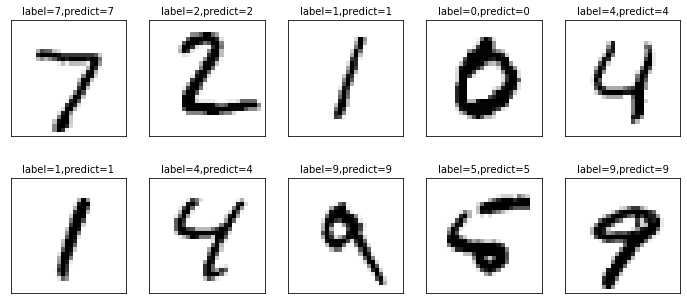

In [20]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [21]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,2,1,0,2,2,9,1
3,0,0,2,994,0,1,0,3,6,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,852,7,2,8,3
6,6,3,3,1,3,3,937,0,2,0
7,0,5,13,6,1,0,0,988,6,9
8,5,0,3,6,2,1,1,2,953,1


In [22]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [23]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


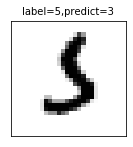

In [24]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

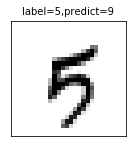

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)